# Probability  of the Loan Defaulters

For this codealong we will be exploring the publicly available data from LendingClub.com. 
Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor one would want to invest in people who showed a profile of having a high probability of paying the amount back.


## Problem Statement

What is the probability that the borrower paid back their loan in full?


## About the Dataset

The snapshot of the data you will be working on:

![dtdataset](../images/dt_dataset.png)


|Feature|Description|
|-----|-----|
|customer.id|ID of the customer|
|credit.policy|If the customer meets the credit underwriting criteria of LendingClub.com or not|
|purpose|The purpose of the loan(takes values :"credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").|
|int.rate|The interest rate of the loan|
|installment|The monthly installments owed by the borrower if the loan is funded|
|log.annual.inc|The natural log of the self-reported annual income of the borrower|
|dti|The debt-to-income ratio of the borrower (amount of debt divided by annual income)|
|fico|The FICO credit score of the borrower|
|days.with.cr.line|The number of days the borrower has had a credit line.|
|revol.bal|The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)|
|revol.util|The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)|
|pub.rec| The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
|inq.last.6mths| The borrower's number of inquiries by creditors in the last 6 months|
|delinq.2yrs| The number of times the borrower had been 30+ days past due on a payment in the past 2 years|
|paid.back.loan|Whether the user has paid back loan|


## Read data and perform Independence check

To calculate the joint probability it's very important that conditions are idependent from each other. Les's check whether the condition `fico` credit score is greater than `700` and `purpose == 'debt_consolation'` are independent from each other.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv("../data/cleaned_loan_data.csv")

# probability of  fico score greater than 700

p_a = df[df['fico'].astype(float) >700].shape[0]/df.shape[0]
print(a)


# probability of purpose == debt_consolidation
p_b = df[df['purpose']== 'debt_consolidation'].shape[0]/df.shape[0]
print(b)

# Create new dataframe for condition ['purpose']== 'debt_consolidation' 
df1 = df[df['purpose']== 'debt_consolidation']

# Calculate the P(A|B)
a_b = df1[df1['fico'].astype(float) >700].shape[0]/df1.shape[0]

# Check whether the P(A) and P(B) are independent from each other
result = (a == a_b)
print(result)


0.5593025683858843
0.4131342660263103
False


## Bayes theorem

Calculating conditional probabilty is the very important step. Let's calculate the bayes theorem for the  probability of credit policy is yes and the person is given the loan.



In [40]:
# probability of paid_back_loan is Yes
prob_lp = df[df['paid.back.loan'] == 'Yes'].shape[0] / df.shape[0]

print(prob_lp)

# probability of the credit policy is Yes
prob_cs = df[df['credit.policy'] == 'Yes'].shape[0]  / df.shape[0]


print(prob_cs)
# create new dataframe for paid.back.loan == 'Yes'
new_df = df[df['paid.back.loan'] == 'Yes']

# Calculate the P(B|A)
prob_pd_cs = new_df[new_df['credit.policy'] == 'Yes'].shape[0] / new_df.shape[0]

print(prob_pd_cs)

# bayes theorem 

bayes = (prob_pd_cs * prob_lp)/ prob_cs

# print bayes
print(bayes)

0.8399457089162664
0.8049697222802256
0.8323182100683655
0.8684824902723735


## Visualize purpose vs Paid back loan


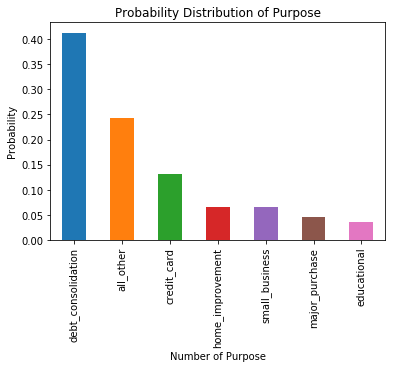

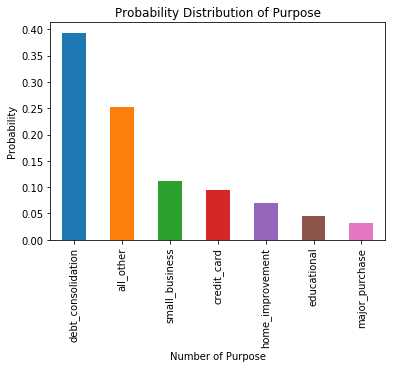

In [41]:
# print(df['purpose'].value_counts(normalize = True))

# create bar plot for purpose
df.purpose.value_counts(normalize=True).plot(kind='bar')
plt.title("Probability Distribution of Purpose")
plt.ylabel("Probability")
plt.xlabel("Number of Purpose")
plt.show()

#create new dataframe for paid.back.loan == 'No'
df1= df[df['paid.back.loan'] == 'No']

# plot the bar plot for 'purpose' where paid.back.loan == No 
df1.purpose.value_counts(normalize=True).plot(kind='bar')
plt.title("Probability Distribution of Purpose")
plt.ylabel("Probability")
plt.xlabel("Number of Purpose")
plt.show()

## Visualization of Installment

- Calculate mean and median of installments
- Visualise the distribution

/home/bhushan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


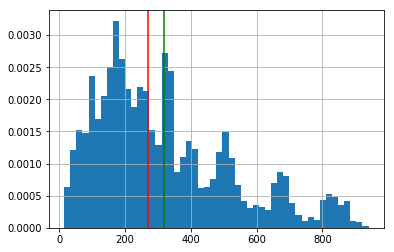

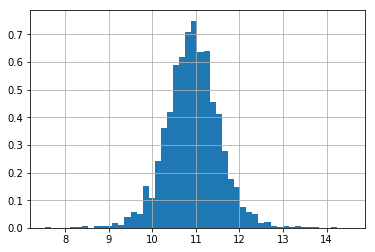

In [70]:
#df.installment.hist(normed = True, bins=50)

# Calculate median 
inst_median = df['installment'].median()
inst_mean = df['installment'].mean()


# histogram for installment
df['installment'].hist(normed = True, bins=50)
plt.axvline(x=inst_median,color='r')
plt.axvline(x=inst_mean,color='g')

plt.show()

#histogram for log anual income
df['log.annual.inc'].hist(normed = True, bins=50)
plt.show()